# Import datasets

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Clean and restructure data

In [8]:
df_impExp = pd.read_csv('../energy_import_export.csv')

# Remove all exports to only get consumption data
df_impExp = df_impExp[df_impExp['Retning'] != 'EXPORT']
# Remove unecessary columns
df_impExp = df_impExp.drop(['Energikilde', 'Retning'], axis=1)
# Reformat date and set as index
df_impExp['Tidspunkt'] = pd.to_datetime(df_impExp['Tidspunkt'])
df_impExp.set_index('Tidspunkt', inplace=True)

# Split into different dfs for each building
df_solar = df_impExp[df_impExp['Måler-Id'] == 707057500042745649]
df_2 = df_impExp[df_impExp['Måler-Id'] == 707057500038344962]
df_3 = df_impExp[df_impExp['Måler-Id'] == 707057500085390523]
df_4 = df_impExp[df_impExp['Måler-Id'] == 707057500042201572]

# Group each df by month
m_means_solar = df_solar['Verdi'].resample('ME').mean()
m_means_2 = df_2['Verdi'].resample('ME').mean()
m_means_3 = df_3['Verdi'].resample('ME').mean()
m_means_4 = df_4['Verdi'].resample('ME').mean()

print(m_means_solar)
print(m_means_2)
print(m_means_3)
print(m_means_4)

Tidspunkt
2023-07-31    26.433602
2023-08-31    29.810484
2023-09-30    32.067486
2023-10-31    33.354069
2023-11-30    37.525014
2023-12-31    40.667204
2024-01-31    42.173253
2024-02-29    35.597069
2024-03-31    30.906595
2024-04-30    26.479722
2024-05-31    21.991532
2024-06-30    24.001111
2024-07-31    28.196640
2024-08-31    31.533468
2024-09-30    33.392708
Freq: ME, Name: Verdi, dtype: float64
Tidspunkt
2023-07-31    34.591667
2023-08-31    34.119355
2023-09-30    31.052500
2023-10-31    28.790054
2023-11-30    31.481944
2023-12-31    32.834140
2024-01-31    34.212097
2024-02-29    32.915805
2024-03-31    31.334401
2024-04-30    31.166944
2024-05-31    35.165323
2024-06-30    34.325833
2024-07-31    40.188172
2024-08-31    34.145699
2024-09-30    31.685417
Freq: ME, Name: Verdi, dtype: float64
Tidspunkt
2023-07-31    26.329892
2023-08-31    27.512634
2023-09-30    26.820222
2023-10-31    28.055591
2023-11-30    31.582444
2023-12-31    35.695376
2024-01-31    37.039892
2024-0

Plot figure

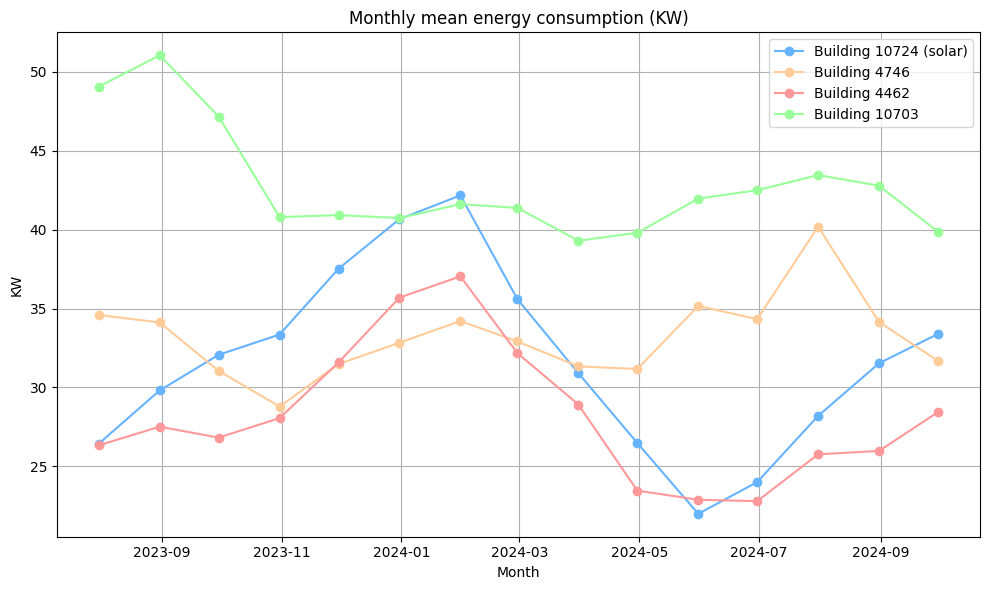

In [9]:
# Plot the montly KW means
plt.figure(figsize=(10, 6))  # Set figure size
plt.title('Monthly mean energy consumption (KW)')
plt.ylabel('KW')
plt.xlabel('Month')
plt.plot(m_means_solar.index, m_means_solar.values, marker='o', color='#66b3ff', label='Building 10724 (solar)')
plt.plot(m_means_2.index, m_means_2.values, marker='o', color='#ffcc99', label='Building 4746')
plt.plot(m_means_3.index, m_means_3.values, marker='o', color='#ff9999', label='Building 4462')
plt.plot(m_means_4.index, m_means_4.values, marker='o', color='#99ff99', label='Building 10703')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()
